In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Speed+Dating+Data.csv', encoding = 'latin-1')

In [3]:
# visualiser les premières lignes du fichier
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# afficher les informations du fichier
df.shape
print(f'Le fichier comporte {df.shape[0]} lignes et {df.shape[1]} colonnes')

df.describe(include='all')




Le fichier comporte 8378 lignes et 195 colonnes


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


# 1 / Analyse du profil des participants

> Ajouter une citation



In [5]:
# Les informations personnelles sont répétées sur chaque ligne d'un user, il faut donc supprimer les doublons pour ne conserver qu'une ligne par individu
df_profil = df[['iid', 'age', 'gender', 'race', 'field_cd', 'goal', 'date', 'go_out']]
df_profil_unique = df_profil.drop_duplicates(subset=['iid'])
print(f"Nombre de lignes avant suppression des doublons : {len(df_profil)}")
print(f"Nombre de lignes après suppression des doublons : {len(df_profil_unique)}")

Nombre de lignes avant suppression des doublons : 8378
Nombre de lignes après suppression des doublons : 551


In [6]:
df_profil_unique.isna().sum() # identification des lignes contenant des valeurs manquantes

,0
iid,0
age,8
gender,0
race,6
field_cd,7
goal,7
date,8
go_out,7


In [7]:
df_profil_unique = df_profil_unique.dropna() # suppression des lignes contenant des valeurs manquantes
df_profil_unique.isna().sum()

print(f'Nombre de lignes après suppression des lignes contenant des valeurs manquantes : {len(df_profil_unique)}')
print("Nous avons 540 participants pour lesquels nous disposons de l'ensemble des informations concernant leur profil")

Nombre de lignes après suppression des lignes contenant des valeurs manquantes : 540
Nous avons 540 participants pour lesquels nous disposons de l'ensemble des informations concernant leur profil


In [8]:
# insérer 6 graphiques pour montrer le profil des participants:
# 1 / Répartition hommes/femmes
# 2 / Pyramide des âges
# 3 / Origine ethnique
# 4 / Secteurs d'étude
# 5 / Répartition des objectifs par genre
# 6 / Classification par fréquence de sortie

# Création des emplacements
fig = make_subplots(
    rows=3, cols=2,
    vertical_spacing=0.1,
    horizontal_spacing=0.3,
    specs=[[{'type':'domain'}, {'type':'xy'}],
           [{'type':'domain'},{'type':'xy'}],
           [{'type':'polar'}, {'type':'xy'}]]
)

# Graphique 1 : Répartition hommes/femmes

gender_labels = {0: 'Femmes', 1: 'Hommes'}
df_profil_unique['gender_label'] = df_profil_unique['gender'].map(gender_labels)

fig.add_trace(go.Pie(
    labels=df_profil_unique['gender_label'].value_counts().index,
    values=df_profil_unique['gender_label'].value_counts().values,
    textinfo = 'label+percent',
    marker=dict(colors=['skyblue','pink'])),
    row=1, col=1)

# Graphique 2 : Histogramme de la pyramide des âges

age_mean = df_profil_unique['age'].mean()
age_median = df_profil_unique['age'].median()

# It's crucial to get the max_y for the histogram's y-axis to scale the line correctly
# You can use np.histogram to get counts and then find the max.
counts, bins = np.histogram(df_profil_unique['age'], bins=np.arange(15, 101, 1))
max_y_hist = np.max(counts) * 1.05 # Add a small buffer for the line to go slightly above max bar

fig.add_trace(go.Histogram(
    x=df_profil_unique['age'],
    xbins=dict(start=15, end=100, size=1),
    name='Répartition par âge', # Give a name for hover or if legend was enabled
    marker_color='skyblue', # Optional: make it pretty
    opacity=0.7
),
    row=1, col=2)

# ajouter la ligne d'age_median
fig.add_trace(go.Scatter(
    x=[age_median, age_median],
    y=[0, max_y_hist], # Use the dynamically determined max_y_hist
    mode='lines',
    line=dict(
        color='black',
        width=1,
        dash='dash')
),row=1, col=2)

# graphique 3 : Origine ethnique
race_labels = {
    1: "Black/African American",
    2: "European/Caucasian-American",
    3: "Latino/Hispanic American",
    4: "Asian/Pacific Islander/Asian-American",
    5: "Native American",
    6: "Other"
}

df_profil_unique['race_label'] = df_profil_unique['race'].map(race_labels)

fig.add_trace(go.Pie(
    labels=df_profil_unique['race_label'].value_counts().index,
    values=df_profil_unique['race'].value_counts(),
    textinfo = 'label+percent'),
              row=2,col=1)

# graphique 4 : secteur d'étude

field_cd_labels = {
    1: 'Law',
    2: 'Math',
    3: 'Social Sc., Psychologist',
    4: 'Medic.Sc., Pharmaceuticals, Bio Tech',
    5: 'Engineering',
    6: 'English/Writing/ Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education, Academia',
    10: 'Biological Sc./Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Sc./International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}
df_profil_unique['field_cd_label'] = df_profil_unique['field_cd'].map(field_cd_labels)
field_counts = df_profil_unique['field_cd_label'].value_counts(normalize=True).sort_values(ascending=True) * 100

fig.add_trace(go.Bar(
    x=field_counts.values,
    y=field_counts.index,
    orientation='h',
    name="Secteur d'étude",
    marker_color='skyblue',
    opacity=0.7,
    text=[f"{v:.1f}%" for v in field_counts.values],  # pourcentage sur les barres
    textposition="auto"
), row=2, col=2)

# Axe en %
fig.update_xaxes(title_text="Pourcentage (%)", row=2, col=2, tickformat=".0f")

# graphique 5 : radar chart des objectifs(goal) en fonction du genre

goal_labels = {
    1: "Passer une soirée sympa",
    2: "Rencontrer de nouvelles personnes",
    3: "Obtenir un rendez-vous",
    4: "Chercher une relation sérieuse",
    5: "Pour dire que je l’ai fait",
    6: "Autre"
}

df_profil_unique['goal_label'] = df_profil_unique['goal'].map(goal_labels)

# calcul du nombre de participants par genre et par goal
goal_gender_counts = (
    df_profil_unique
    .groupby(['gender', 'goal_label'])
    .size()
    .unstack(fill_value=0)
)
# Convertir en % par genre
goal_gender_percent = goal_gender_counts.div(goal_gender_counts.sum(axis=1), axis=0) * 100
# Couleurs par genre : bordure + remplissage transparent
gender_colors = {
    0: {"line": "deeppink", "fill": "rgba(255,192,203,0.4)"},   # Femmes : rose clair en fill
    1: {"line": "blue",     "fill": "rgba(135,206,235,0.4)"}    # Hommes : bleu ciel transparent
}

for gender in goal_gender_percent.index:
    gender_name = gender_labels.get(gender, str(gender))  # Hommes/Femmes
    fig.add_trace(go.Scatterpolar(
        r=goal_gender_percent.loc[gender].values,
        theta=goal_gender_percent.columns,
        fill='toself',
        name=gender_name,
        hoverinfo='r+name',
        line=dict(color=gender_colors[gender]["line"], width=2),
        fillcolor=gender_colors[gender]["fill"]
    ),row=3, col=1)

# Graphique 6: classement par habitudes de sortie (go out)

go_out_labels = {
    1: "Plusieurs fois par semaine",
    2: "2 fois par semaine",
    3: "1 fois par semaine",
    4: "2 fois par mois",
    5: "1 fois par mois",
    6: "Plusieurs fois par an",
    7: "Presque jamais"}

df_profil_unique['go_out_label'] = df_profil_unique['go_out'].map(go_out_labels)

go_out_counts = df_profil_unique['go_out_label'].value_counts(normalize=True).sort_values(ascending=False) * 100

fig.add_trace(go.Bar(
    x=go_out_counts.index,
    y=go_out_counts.values,
    name="Classement par go out",
    marker_color='skyblue',
    opacity=0.7,
    text=[f"{v:.1f}%" for v in go_out_counts.values],  # pourcentage sur les barres
    textposition="auto"
), row=3, col=2)

# Axe en %
fig.update_yaxes(title_text="Pourcentage (%)", row=3, col=2, tickformat=".0f")



# --- Consolidated fig.update_layout for global settings ---
fig.update_layout(
    height=1200,
    width=1400,
    yaxis=dict(tickfont=dict(size=5)),
    showlegend=False, # Set this once for the entire figure
    title_text = 'Analyse des Profils des Participants',
    title_font = dict(size=24),
    title_x = 0.5
)


# --- Add titles for individual subplots using annotations ---
fig.update_annotations(font_size=16) # Set default font size for annotations

fig.add_annotation(
    xref="paper", yref="paper", # "paper" permet de positionner l'annotation par rapport à la surface entiere du graphe et non par rapport aux données tracées
    x=0.07, y=1.04, # x and y position relative to the subplot
    text="Répartition hommes/femmes",
    font=dict(size=18), # Specific font size for this title
    showarrow=False
)

fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.5, y=1.15, # Adjust y slightly to avoid overlap if needed
    text="Pyramide des âges",
    font=dict(size=18),
    showarrow=False,
    row=1, col=2 # Target the specific subplot
)

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.11, y=0.68,
    text="Origine ethnique",
    font=dict(size=18), # Specific font size for this title
    showarrow=False
)

fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.5, y=1.15, # Adjust y slightly to avoid overlap if needed
    text="Domaine d'études",
    font=dict(size=18),
    showarrow=False,
    row=2, col=2 # Target the specific subplot
)

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.09, y=0.29, # Adjust y slightly to avoid overlap if needed
    text="Objectifs des participants",
    font=dict(size=18),
    showarrow=False
)

fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.5, y=1.15, # Adjust y slightly to avoid overlap if needed
    text="Habitudes de sortie",
    font=dict(size=18),
    showarrow=False,
    row=3, col=2 # Target the specific subplot
)

# You can also add axis titles directly for specific subplots
fig.update_xaxes(title_text="Âge", row=1, col=2)
fig.update_yaxes(title_text="Nombre de personnes", row=1, col=2)


fig.show()

In [9]:
# calcul des ages médian et moyen
age_mean = df_profil_unique['age'].mean()
age_median = df_profil_unique['age'].median()

print(f"Age moyen des participants : {age_mean:.2f} ans")
print(f"Age médian des participants : {age_median:.2f} ans")

Age moyen des participants : 26.36 ans
Age médian des participants : 26.00 ans


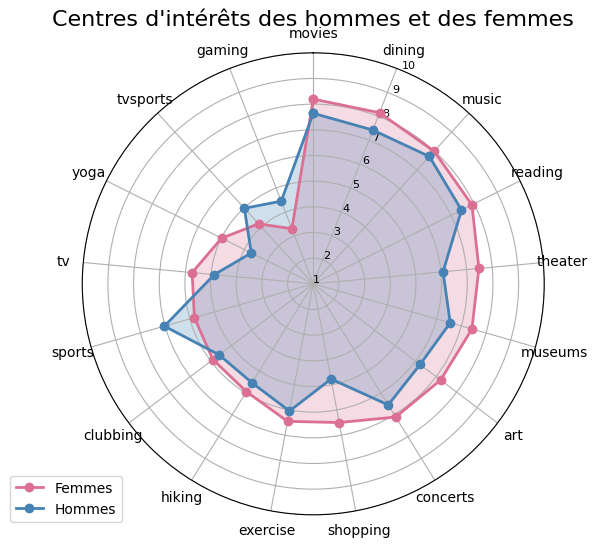

In [10]:
# Comparer les centres d'intérêts des hommes et des femmes sous forme de radar chart

# Charger les données
df = pd.read_csv('Speed+Dating+Data.csv', encoding='latin1')

# Séparer les données par genre
df_femmes = df[df['gender'] == 0].copy()
df_hommes = df[df['gender'] == 1].copy()

# Définir les colonnes d'activités
activite_cols = [
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
    'movies', 'concerts', 'music', 'shopping', 'yoga'
]

# Calculer la moyenne pour chaque activité par genre
activite_moyennes_femmes = df_femmes[activite_cols].mean()
activite_moyennes_hommes = df_hommes[activite_cols].mean()

# Normaliser les données pour une meilleure visualisation sur le graphique radar
data_min = 1
data_max = 10
# Normalisation des notes de 1 à 10 vers une échelle de 0 à 1
# Formule: (note - min) / (max - min)
normalized_femmes = (activite_moyennes_femmes - data_min) / (data_max - data_min)
normalized_hommes = (activite_moyennes_hommes - data_min) / (data_max - data_min)

# Trier les activités par note moyenne des femmes (par exemple)
# Cela permet de voir le classement clairement sur le graphique
sorted_labels = normalized_femmes.sort_values(ascending=False).index.tolist()
sorted_values_femmes = normalized_femmes.loc[sorted_labels].tolist()
sorted_values_hommes = normalized_hommes.loc[sorted_labels].tolist()

# Préparation pour le tracé du graphique radar
num_vars = len(sorted_labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Fermer le cercle

# Ajouter le premier point à la fin pour boucler
sorted_values_femmes += sorted_values_femmes[:1]
sorted_values_hommes += sorted_values_hommes[:1]

# Créer le graphique radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_title('Centres d\'intérêts des hommes et des femmes', fontsize=16, pad=20)

# Tracer les données des femmes
ax.plot(angles, sorted_values_femmes, color='palevioletred', linewidth=2, label='Femmes', marker='o')
ax.fill(angles, sorted_values_femmes, color='palevioletred', alpha=0.25)

# Tracer les données des hommes
ax.plot(angles, sorted_values_hommes, color='steelblue', linewidth=2, label='Hommes', marker='o')
ax.fill(angles, sorted_values_hommes, color='steelblue', alpha=0.25)

# Configurer les axes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(sorted_labels, fontsize=10)

# Configurer l'échelle de l'axe radial de 1 à 10
ax.set_yticks(np.linspace(0, 1, 10))
ax.set_yticklabels([str(i) for i in range(1, 11)], fontsize=8)

# Ajouter la légende
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [11]:
# Comparer les qualités recherchées par l'individu A avec l'auto-évaluation faite par l'individu B

# Définir les colonnes des qualités recherchées
preference_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
preference_labels = ['Attirance', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêts Communs']

# Grouper par genre et calculer la moyenne des préférences
average_preferences = df.groupby('gender')[preference_cols].mean().reset_index()

# Mapper le genre pour la lisibilité
gender_mapping = {0: 'Femmes', 1: 'Hommes'}
average_preferences['gender_label'] = average_preferences['gender'].map(gender_mapping)

# 'Dé-pivoter' le DataFrame pour un format adapté à Plotly Express
df_melted = average_preferences.melt(
    id_vars='gender_label',
    value_vars=preference_cols,
    var_name='Qualité',
    value_name='Note Moyenne'
)

# Remplacer les noms de colonnes techniques par des étiquettes lisibles
df_melted['Qualité'] = df_melted['Qualité'].map(dict(zip(preference_cols, preference_labels)))

# Trier les qualités en fonction des préférences des femmes (gender_label == 'Femmes')
df_femmes = df_melted[df_melted['gender_label'] == 'Femmes'].sort_values(by='Note Moyenne', ascending=False)
ordre_qualites_femmes = df_femmes['Qualité'].tolist()

# Convertir la colonne 'Qualité' en type catégorique avec l'ordre défini
df_melted['Qualité'] = pd.Categorical(df_melted['Qualité'], categories=ordre_qualites_femmes, ordered=True)

# Trier le DataFrame complet pour que l'ordre des barres soit correct
df_melted = df_melted.sort_values(by=['Qualité', 'gender_label'])

# Créer le graphique à barres groupées avec Plotly Express
fig_bar = px.bar(
    df_melted,
    x='Qualité',
    y='Note Moyenne',
    color='gender_label',
    barmode='group',
    title='Qualités recherchées par genre (triées par préférences des femmes)',
    labels={'Note Moyenne': 'Note Moyenne (1-100%)'},
    color_discrete_map={'Femmes': 'palevioletred', 'Hommes': 'steelblue'}
)

# Ajuster la mise en page
fig_bar.update_layout(
    xaxis_title='Qualité',
    yaxis_title='Note Moyenne (1-100%)',
    legend_title='Genre',
    xaxis_tickangle=-45,
    yaxis_range=[0, 30]
)

fig_bar.show()

# 2/ Résultats des speed datings

match
0    6998
1    1380
Name: count, dtype: int64


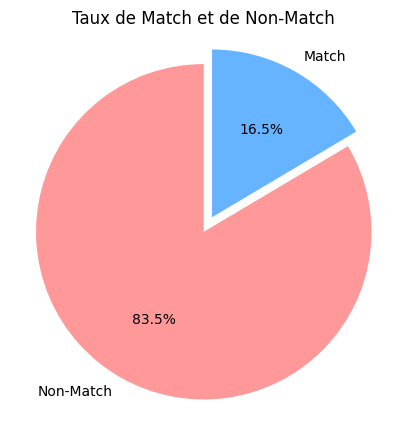

date_3
0.0    1021
1.0     359
Name: count, dtype: int64


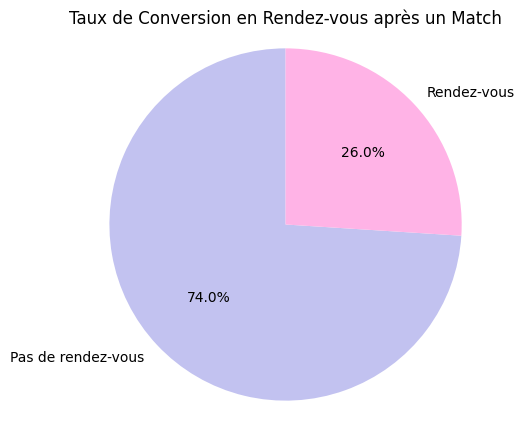

In [12]:
# Calculer et visualiser le nombre de match et de rendez-vous

# --- Visualisation 1 : Taux de match/non-match ---
# Compter le nombre de matchs (1) et de non-matchs (0)
match_counts = df['match'].value_counts()
match_labels = ['Non-Match', 'Match']
match_colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) # Mettre en évidence la section 'Match'
print(match_counts)

# Créer le premier graphique à secteurs
plt.figure(figsize=(5, 5))
plt.pie(match_counts, labels=match_labels, autopct='%1.1f%%', startangle=90, colors=match_colors, explode=explode)
plt.title('Taux de Match et de Non-Match')
plt.axis('equal') # Assure que le graphique est circulaire
plt.show()

# --- Visualisation 2 : Taux de conversion en rendez-vous pour les matchs ---
# Filtrer les données pour ne garder que les 'matchs'
matched_df = df[df['match'] == 1].copy()
# Remplacer les valeurs manquantes (NaN) dans la colonne 'date_3' par 0, si nécessaire
matched_df['date_3'] = matched_df['date_3'].fillna(0)
# Compter le nombre de rendez-vous (1) et de non-rendez-vous (0) parmi les matchs
date_conversion_counts = matched_df['date_3'].value_counts()
date_labels = ['Pas de rendez-vous', 'Rendez-vous']
date_colors = ['#c2c2f0', '#ffb3e6']
print(date_conversion_counts)

# Créer le deuxième graphique à secteurs
plt.figure(figsize=(5, 5))
plt.pie(date_conversion_counts, labels=date_labels, autopct='%1.1f%%', startangle=90, colors=date_colors)
plt.title('Taux de Conversion en Rendez-vous après un Match')
plt.axis('equal') # Assure que le graphique est circulaire
plt.show()

In [13]:
# Afficher les infos de conversion sous forme de funnel

import plotly.graph_objects as go

# Vos données
stages = ["RENCONTRE", "MATCH", "RENDEZ-VOUS"]
values = [8378, 1380, 359]

fig = go.Figure(go.Funnel(
    y = stages,
    x = values,
    textinfo = "value+percent initial",
    marker={"color": ["#636EFA", "lightsalmon", "#00CC96"]}
))
fig.show()

# 3/ Analyser les critères impactant la décision de "match"

       int_corr  samerace  age_diff
match                              
0      0.191822  0.392969  3.752194
1      0.217319  0.410145  3.181548


/tmp/ipython-input-143021005.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-143021005.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



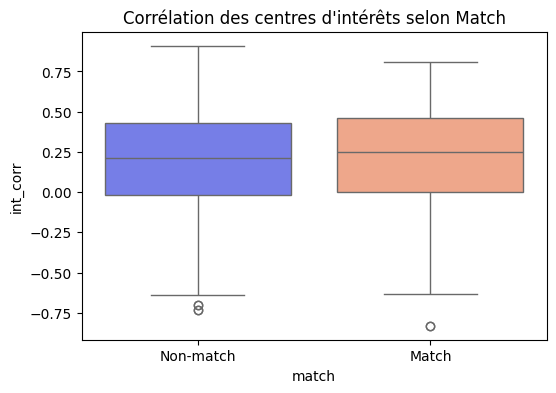

/tmp/ipython-input-143021005.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



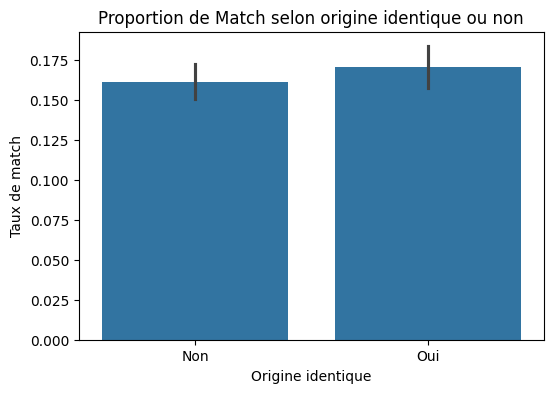

/tmp/ipython-input-143021005.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-143021005.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



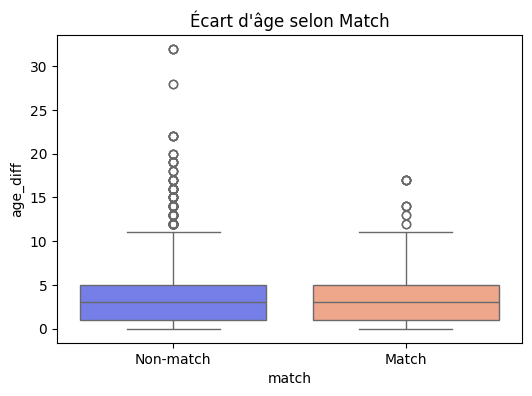

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# On crée une nouvelle variable : écart d'âge
df["age_diff"] = (df["age"] - df["age_o"]).abs()
couleurs_match = {'0': "#636EFA", '1': "lightsalmon"}

# --- Analyse exploratoire ---
# Moyennes par groupe de match
print(df.groupby("match")[["int_corr", "samerace", "age_diff"]].mean())

# --- Visualisations ---
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="match", y="int_corr", data=df, palette= couleurs_match)
plt.title("Corrélation des centres d'intérêts selon Match")
ax.set_xticklabels(["Non-match", "Match"])
plt.show()

plt.figure(figsize=(6,4))
ax = sns.barplot(x="samerace", y="match", data=df)
plt.title("Proportion de Match selon origine identique ou non")
plt.ylabel("Taux de match")
plt.xlabel("Origine identique")
ax.set_xticklabels(["Non", "Oui"])
plt.show()

plt.figure(figsize=(6,4))
ax = sns.boxplot(x="match", y="age_diff", data=df, palette=couleurs_match)
plt.title("Écart d'âge selon Match")
ax.set_xticklabels(["Non-match", "Match"])
plt.show()



In [ ]:

# Evaluer l'impact des qualités recherchées vs auto-évaluation faite par le partenaire


# Renommer les colonnes d'auto-évaluation pour le participant A
df = df.rename(columns={'attr3_1': 'self_attr',
                        'sinc3_1': 'self_sinc',
                        'intel3_1': 'self_intel',
                        'fun3_1': 'self_fun',
                        'amb3_1': 'self_amb'})

# Créer une version du DataFrame pour les auto-évaluations des partenaires
df_partner_self_eval = df[['iid', 'pid', 'self_attr', 'self_sinc', 'self_intel', 'self_fun', 'self_amb']].copy()
df_partner_self_eval = df_partner_self_eval.rename(columns={'iid': 'pid', 'pid': 'iid'})

# Fusionner les données pour que les attentes de A soient sur la même ligne que l'auto-évaluation de B
df_merged = pd.merge(df, df_partner_self_eval, on=['iid', 'pid'], suffixes=('_A', '_B'))

# Définir les colonnes de préférences du participant A (non renommées)
# et d'auto-évaluation du partenaire B (avec suffixe _B)
partner_pref_cols = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb']
partner_self_eval_cols = ['self_attr_B', 'self_sinc_B', 'self_intel_B', 'self_fun_B', 'self_amb_B']

# Supprimer les lignes avec des valeurs manquantes dans les colonnes pertinentes
df_cleaned = df_merged.dropna(subset=partner_pref_cols + partner_self_eval_cols).copy()

# Calculer les médianes pour chaque critère d'auto-évaluation et de préférence
medians = {
    'self_attr_B': df_cleaned['self_attr_B'].median(),
    'self_sinc_B': df_cleaned['self_sinc_B'].median(),
    'self_intel_B': df_cleaned['self_intel_B'].median(),
    'self_fun_B': df_cleaned['self_fun_B'].median(),
    'self_amb_B': df_cleaned['self_amb_B'].median(),
    'pf_o_att': df_cleaned['pf_o_att'].median(),
    'pf_o_sin': df_cleaned['pf_o_sin'].median(),
    'pf_o_int': df_cleaned['pf_o_int'].median(),
    'pf_o_fun': df_cleaned['pf_o_fun'].median(),
    'pf_o_amb': df_cleaned['pf_o_amb'].median()
}

# Définir la liste des critères et des colonnes correspondantes
criteria_map = {
    'Attirance': ('pf_o_att', 'self_attr_B'),
    'Sincérité': ('pf_o_sin', 'self_sinc_B'),
    'Intelligence': ('pf_o_int', 'self_intel_B'),
    'Humour': ('pf_o_fun', 'self_fun_B'),
    'Ambition': ('pf_o_amb', 'self_amb_B')
}

# Créer une figure pour les subplots
fig, axes = plt.subplots(nrows=1, ncols=len(criteria_map), figsize=(16, 6), sharey=True)
fig.suptitle('Taux de Match et de Non-Match en fonction de la Correspondance entre qualité recherchée chez le partenaire et auto-évaluation du partenaire', fontsize=16)

# Boucle pour générer un graphique pour chaque critère
for i, (name, (pref_col, self_col)) in enumerate(criteria_map.items()):
    # Définir le groupe de coïncidence
    df_cleaned[f'{name}_coincidence'] = np.where(
        (df_cleaned[self_col] >= medians[self_col]) &
        (df_cleaned[pref_col] >= medians[pref_col]),
        'Concordance', 'Différence'
    )

    # Calculer le nombre de matchs et de non-matchs par groupe
    match_counts = df_cleaned.groupby(f'{name}_coincidence')['match'].value_counts(normalize=True).unstack(fill_value=0)
    match_counts.rename(columns={0: 'Non-Match', 1: 'Match'}, inplace=True)
    match_counts.index.name = None # Supprimer l'index pour un meilleur affichage

    # Plotting
    match_counts.plot(kind='bar', stacked=True, ax=axes[i], rot=0, color=['#636EFA','lightsalmon'])
    axes[i].set_title(name)
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('Proportion (1 = 100%)')
    else:
        axes[i].get_legend().remove()

    # Ajouter des étiquettes de texte
    for rect in axes[i].patches:
        height = rect.get_height()
        if height > 0:
            axes[i].text(rect.get_x() + rect.get_width() / 2,
                         rect.get_y() + height / 2,
                         f'{height:.1%}',
                         ha='center', va='center', fontsize=10, color='black', weight='bold')

handles, labels = axes[0].get_legend_handles_labels()

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
df_cleaned.shape